In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [9]:
# load Pivot data
url = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/RW.csv'
df = pd.read_csv(url, delimiter=';')
# Menentukan input and output
X = df.drop(columns=["GOAL","7MSHOT","9MSHOT","6MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
y = df.GOAL
# Membagi data set 80 : 20 train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Merancang Neural Network Model
model = Sequential()
model.add(Flatten(input_shape=(6,)))  
model.add(RBFLayer(6, 0.5))
model.add(Dense(1, activation='linear'))  
model.compile(optimizer='RMSprop', loss=mean_squared_error) 
# Melatih arsitektur model terhadap dataset
model.fit(X_train, y_train, batch_size=8, epochs=100)
# Melakukan prediksi nilai
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Epoch 1/100
115/115 [==============================] - 0s 1ms/step - loss: 11.5651
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 9.3353
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 7.9937
Epoch 4/100
115/115 [==============================] - 0s 1ms/step - loss: 7.2294
Epoch 5/100
115/115 [==============================] - 0s 1ms/step - loss: 6.6450
Epoch 6/100
115/115 [==============================] - 0s 1ms/step - loss: 6.0733
Epoch 7/100
115/115 [==============================] - 0s 927us/step - loss: 5.5253
Epoch 8/100
115/115 [==============================] - 0s 1ms/step - loss: 4.9643
Epoch 9/100
115/115 [==============================] - 0s 2ms/step - loss: 4.4494
Epoch 10/100
115/115 [==============================] - 0s 1ms/step - loss: 4.0002
Epoch 11/100
115/115 [==============================] - 0s 1ms/step - loss: 3.6586
Epoch 12/100
115/115 [==============================] - 0s 1ms/step - loss: 3.3837
Epoch 13/1

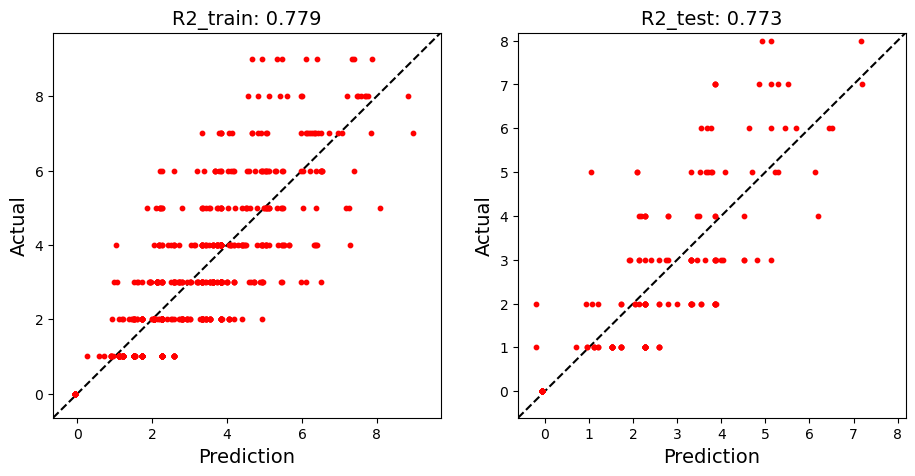

Mean Squared Error (MSE) 1.307952493501781
Mean Absolute Error (MAE) 0.7476144329361294


In [10]:
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)
    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, pred_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, pred_test)
    print(f"Mean Squared Error (MSE)",mse)
    print(f"Mean Absolute Error (MAE)",mae) 
   


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 rbf_layer (RBFLayer)        (None, 6)                 36        
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
urlacc = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/Sensitivity/ACC.csv'
acc_df = pd.read_csv(urlacc, delimiter = ';')
acc_sensitivity = model.predict(acc_df)
print(acc_sensitivity)

3/3 [==============================] - 0s 1ms/step
[[-0.05560684]
 [ 0.13892055]
 [ 0.41144204]
 [ 0.76434946]
 [ 1.184015  ]
 [ 1.6373966 ]
 [ 2.0738401 ]
 [ 2.433244  ]
 [ 2.6592638 ]
 [ 2.7137046 ]
 [ 2.5870712 ]
 [-0.05560684]
 [ 0.07791305]
 [ 0.25972378]
 [ 0.48808575]
 [ 0.75060797]
 [ 1.0232092 ]
 [ 1.2725983 ]
 [ 1.462478  ]
 [ 1.5620741 ]
 [ 1.5542777 ]
 [ 1.4404508 ]
 [-0.05560684]
 [ 0.15181136]
 [ 0.35482788]
 [ 0.52609205]
 [ 0.6391125 ]
 [ 0.67492557]
 [ 0.6272969 ]
 [ 0.5044949 ]
 [ 0.32694435]
 [ 0.12167501]
 [-0.08436441]
 [-0.05560684]
 [ 0.31665206]
 [ 0.72723484]
 [ 1.1253357 ]
 [ 1.4736211 ]
 [ 1.752331  ]
 [ 1.9579847 ]
 [ 2.0986278 ]
 [ 2.188085  ]
 [ 2.2411368 ]
 [ 2.270524  ]
 [-0.05560684]
 [ 0.2624576 ]
 [ 0.6391492 ]
 [ 1.044188  ]
 [ 1.4317815 ]
 [ 1.7481627 ]
 [ 1.9435098 ]
 [ 1.9847336 ]
 [ 1.8646414 ]
 [ 1.6039872 ]
 [ 1.2456075 ]
 [-0.05560684]
 [ 0.14912319]
 [ 0.3983009 ]
 [ 0.657547  ]
 [ 0.89780736]
 [ 1.100062  ]
 [ 1.2563965 ]
 [ 1.3680892 ]
 [ 1

In [103]:
pd.DataFrame(acc_sensitivity).to_csv('sensitivitasaccuracy.csv', index=False)